In [1]:
import random
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Setup & Configure Experiment

In [2]:
valW = 16
valH = 12
#plt.figure(figsize=(valW,valH))

In [3]:
random.seed(45)
valW = 16
valH = 12
n = 100000
numTosses = 500

# Basic Coin Toss Setup

In [4]:
def coinToss(number):
    recordList = []
    for amount in range(number):
         flip = random.randint(0,1)
         if(flip == 0):
              recordList.append("Heads")
    return(recordList.count("Heads")/number)

In [5]:
# Should return the percentage of heads for n tosses.
coinToss(n)

0.49858

# Run ***n*** Times

In [6]:
def calculateMovingAverage(valList):
    tmpAvgRunning = []
    for i in range(1,len(valList)+1):
        tmpAvgRunning.append(mean(valList[0:i]))
    return(tmpAvgRunning)

def calculateMovingAverageFast(valList):
    tmpAvgRunning = []
    for i in range(0,len(valList)):
        if(i==0):
            tmpAvgRunning.append(valList[i])
        else:
            tmpNextVal = (tmpAvgRunning[i-1]*i+valList[i])/(i+1)
            tmpAvgRunning.append(tmpNextVal)
    return(tmpAvgRunning)

In [7]:
%%time
tmpToss = [coinToss(numTosses) for i in range(n)]
print(mean(tmpToss))

0.50002642
CPU times: user 1min 28s, sys: 784 ms, total: 1min 29s
Wall time: 1min 31s


In [8]:
#NOT RUN; Previous output below.
#%%time
#tmpAvg1 = calculateMovingAverage(tmpToss)

CPU times: user 1h 47min 23s, sys: 20.2 s, total: 1h 47min 43s

Wall time: 4h 54min 15s

In [9]:
#NOT RUN; Previous output below.
#%%time
#tmpAvg2 = calculateMovingAverageFast(tmpToss)

CPU times: user 82.8 ms, sys: 12.3 ms, total: 95.1 ms

Wall time: 93.6 ms

# Run 5 Experiments ***n*** Times

In [10]:
def runExperiment(valN=10000,valTosses=500):
    tmpToss = [coinToss(numTosses) for i in range(n)]
    return(tmpToss)

In [11]:
%%time
dfTosses = pd.DataFrame()
for i in range(0,5):
    tmpResults = runExperiment(valN=n,valTosses=numTosses)
    tmpID = [i] * n
    dfToss = pd.DataFrame({'RunNum':list(range(0,len(tmpResults))),'PercentHeads':tmpResults,'ExpNum':tmpID})
    dfToss['AverageMoving'] = calculateMovingAverageFast(tmpResults)
    dfTosses = dfTosses.append(dfToss)

CPU times: user 7min 29s, sys: 4.23 s, total: 7min 33s
Wall time: 7min 48s


# Plot Each Experiment's Moving Average
This will show the smoothing over time as we increase the number of coin tosses for each experiment.

Text(0.5,1,'Moving Average by Run Number for Each Experiment')

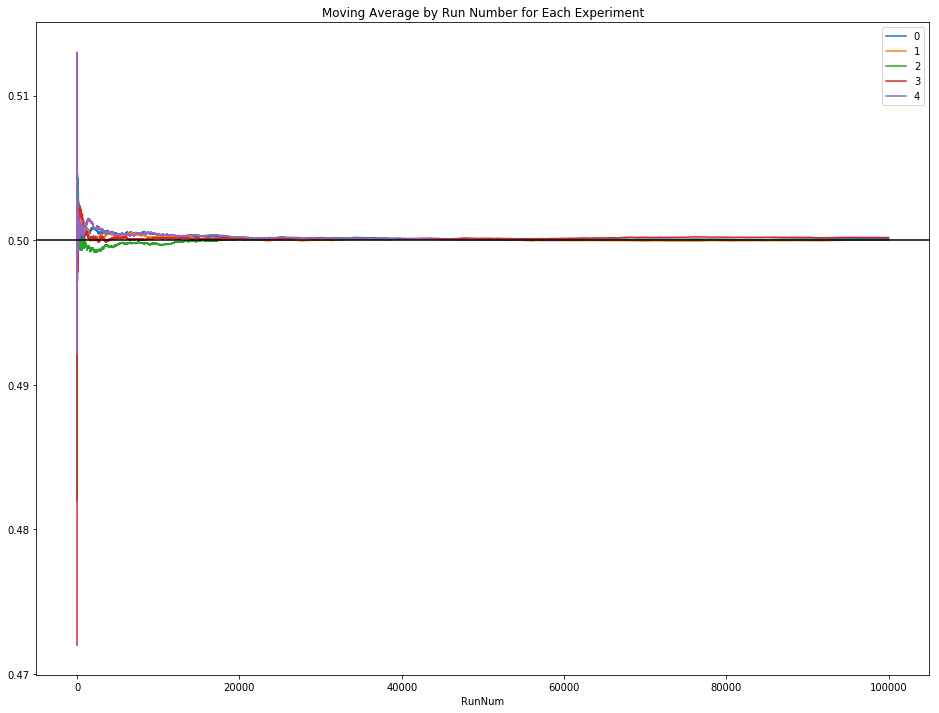

In [12]:
fig, ax = plt.subplots(figsize=(valW,valH))
bp = dfTosses.groupby('ExpNum').plot(x='RunNum',y='AverageMoving',ax=ax)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.legend(labels=list(dfTosses['ExpNum'].unique()))
plt.title("Moving Average by Run Number for Each Experiment")

Text(0.5,1,'Moving Average by Run Number for the Beginning of Each Experiment')

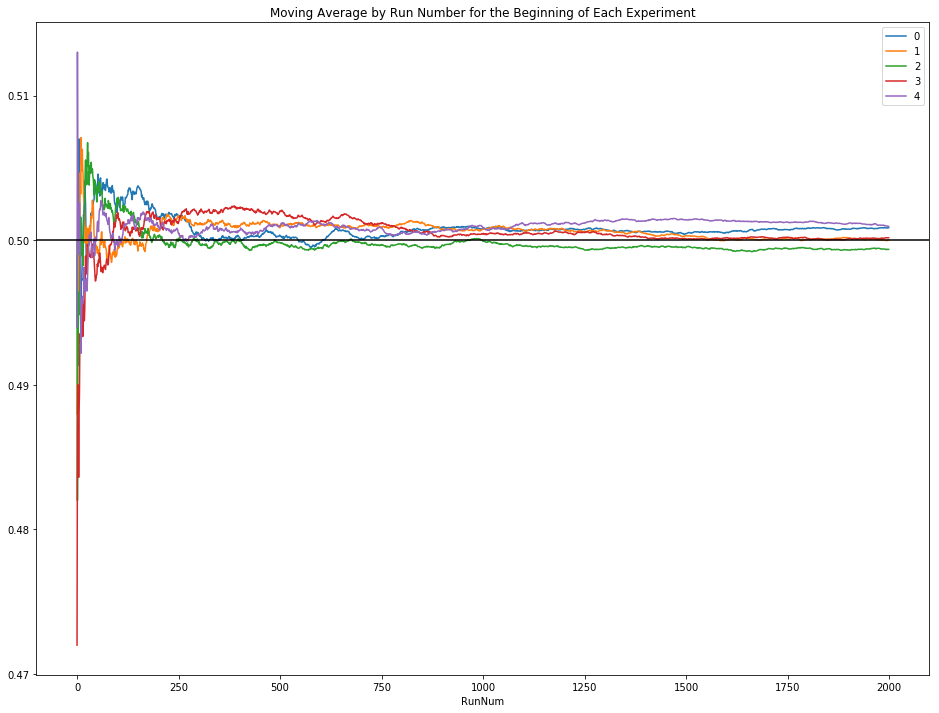

In [13]:
dfTossesBeg = dfTosses[dfTosses['RunNum']<2000].copy()
fig, ax = plt.subplots(figsize=(valW,valH))
bp = dfTossesBeg.groupby('ExpNum').plot(x='RunNum',y='AverageMoving',ax=ax)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.legend(labels=list(dfTossesBeg['ExpNum'].unique()))
plt.title("Moving Average by Run Number for the Beginning of Each Experiment")

In [14]:
dfTosses[dfTosses.RunNum==(n-1)]

,ExpNum,PercentHeads,RunNum,AverageMoving
99999,0,0.476,99999,0.500098
99999,1,0.536,99999,0.500012
99999,2,0.498,99999,0.500023
99999,3,0.504,99999,0.500184
99999,4,0.484,99999,0.500017


# Bokeh

In [19]:
from bokeh.palettes import Inferno10
from bokeh.plotting import figure, output_file, show
from bokeh.models import NumeralTickFormatter
from bokeh.models import HoverTool,WheelZoomTool, PanTool, ResetTool

tmpHover = HoverTool(tooltips=[('x = ','@x'),('y = ','@y')],mode='vline')
tmpTools = [PanTool(),WheelZoomTool(),ResetTool(),tmpHover]

output_file('experimentCoinToss.html')
numLines = len(dfTossesBeg['ExpNum'].unique())
valPal = Inferno10[0:numLines]

plot = figure(width=valW*100,height=valH*100,title="Moving Average by Run Number for Each Experiment",
              x_axis_label='Run Number',
              x_range=[min(dfTossesBeg['RunNum'])-50,max(dfTossesBeg['RunNum'])+50],
              y_axis_label='Moving Average Number of Heads',
              y_range=[min(dfTossesBeg['AverageMoving']),max(dfTossesBeg['AverageMoving'])],
              tools=tmpTools)
plot.grid.grid_line_alpha = 0.5
tmpX = list(range(0,max(dfTossesBeg['RunNum']+1)))
for i,item in enumerate(dfTossesBeg['ExpNum'].unique()):
    tmpY = dfTossesBeg[dfTossesBeg['ExpNum']==item]['AverageMoving'].copy().tolist()
    plot.line(tmpX,tmpY,legend=(r'Exp. '+str(item)),line_color=valPal[item],line_width=0)
plot.xaxis.formatter = NumeralTickFormatter(format="0")
plot.legend.location = "top_right"    
show(plot)